In [ ]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#import matplotlib
#matplotlib.rcParams["figure.dpi"] = 200  # agar gambar lebih jelas (naikkan nilai dpi=dot per inch)

In [ ]:
def ode_RK4(f, xi, xf, y0, N, verbose=False):
    h = (xf - xi)/N
    if verbose:
        print("ode_RK4 h = %18.10f\n" % (h))
    xsol = xi + np.arange(0,N+1)*h
    # orde dari ODE ditentukan dari jumlah syarat awal yang diberikan
    Ndim = len(y0)
    # array untuk solusi
    ysol = np.zeros((N+1,Ndim))
    # aplikasi syarat awal
    ysol[0,:] = y0[:]
    for i in range(N):
        f1 = h*f( xsol[i], ysol[i,:] )
        f2 = h*f( xsol[i] + h/2, ysol[i,:] + f1/2 )
        f3 = h*f( xsol[i] + h/2, ysol[i,:] + f2/2 )
        f4 = h*f( xsol[i] + h, ysol[i,:] + f3 )
        ysol[i+1,:] = ysol[i,:] + (f1 + 2*(f2 + f3) + f4)/6
    return xsol, ysol

In [80]:
g = 9.8
L = 1.0
k = 0.2

def pendulum_system(t, y):
    dydx = np.zeros(2)
    dydx[0] = y[1]
    dydx[1] = -g/L * np.sin(y[0]) - k*y[1]
    
    return dydx

In [81]:
nilai_awal = [np.pi/2, 0.0]
time_i = 0.0
time_f = 10.0

In [82]:
t, theta = ode_RK4(pendulum_system, time_i, time_f, nilai_awal, 200)

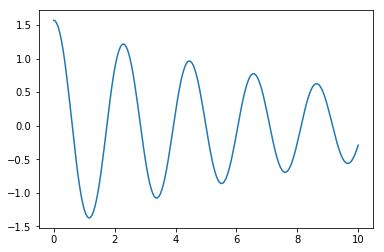

In [83]:
plt.clf()
plt.plot(t, theta[:,0])

In [84]:
xt = L*sin(theta[:,0])
yt = -L*cos(theta[:,0])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 1), ylim=(-1, 1))
ax.set_aspect('equal')
ax.grid()
ax.set_title("Contoh gerakan pendulum")

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, xt[i]]
    thisy = [0, yt[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % t[i])
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(yt)),
                              interval=25, blit=True, init_func=init)

In [89]:
%matplotlib inline
from IPython.display import HTML
HTML( ani.to_html5_video() )